In [1]:
from google.colab import files
file_upload = files.upload()

Saving Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv to Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv
Saving Crops production indicators - FAOSTAT_data_en_2-22-2024.csv to Crops production indicators - FAOSTAT_data_en_2-22-2024.csv
Saving Employment - FAOSTAT_data_en_2-27-2024.csv to Employment - FAOSTAT_data_en_2-27-2024.csv
Saving Exchange rate - FAOSTAT_data_en_2-22-2024.csv to Exchange rate - FAOSTAT_data_en_2-22-2024.csv
Saving Food trade indicators - FAOSTAT_data_en_2-22-2024.csv to Food trade indicators - FAOSTAT_data_en_2-22-2024.csv
Saving Land temperature change - FAOSTAT_data_en_2-27-2024.csv to Land temperature change - FAOSTAT_data_en_2-27-2024.csv
Saving Land use - FAOSTAT_data_en_2-22-2024.csv to Land use - FAOSTAT_data_en_2-22-2024.csv


In [34]:
import pandas as pd
import os

uploaded = file_upload

dfs = []
for filename in uploaded.keys():
  data = pd.read_csv(filename)
  dfs.append(data)

<ipython-input-34-15ffec497255>:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


In [35]:
for i, df in enumerate(dfs):
    print(f"DataFrame {i}: {df.shape}")

DataFrame 0: (112890, 17)
DataFrame 1: (41649, 15)
DataFrame 2: (5917, 19)
DataFrame 3: (103276, 16)
DataFrame 4: (141738, 15)
DataFrame 5: (54810, 14)
DataFrame 6: (97995, 15)


In [36]:
# Start with the columns of the first DataFrame
common_columns = set(dfs[0].columns)

# Iterate through the rest of the DataFrames and find the intersection of columns
for df in dfs[1:]:
    common_columns.intersection_update(set(df.columns))

common_columns_list = list(common_columns)

print("Common columns:", common_columns_list)

Common columns: ['Domain Code', 'Year', 'Year Code', 'Area', 'Flag Description', 'Element Code', 'Unit', 'Flag', 'Area Code (M49)', 'Domain', 'Value', 'Element']


In [37]:
# Common columns
common_columns = set.intersection(*(set(df.columns) for df in dfs))

# Convert the set of common columns to a list
common_columns_list = list(common_columns)

# Filter each DataFrame to include only common columns
filtered_dfs = [df[common_columns_list] for df in dfs]

# Concatenate all filtered DataFrames, ignoring the index
merged_df = pd.concat(filtered_dfs, ignore_index=True)

merged_df = merged_df.rename(columns={'Area Code (M49)': 'Area Code'})

print("Concatenated DataFrame shape:", merged_df.shape)
merged_df.head()

Concatenated DataFrame shape: (558275, 12)


,Domain Code,Year,Year Code,Area,Flag Description,Element Code,Unit,Flag,Area Code,Domain,Value,Element
0,CP,2000,2000,Afghanistan,Imputed value,6125,NaN,I,4,Consumer Price Indices,24.356332,Value
1,CP,2000,2000,Afghanistan,Imputed value,6125,NaN,I,4,Consumer Price Indices,23.636242,Value
2,CP,2000,2000,Afghanistan,Imputed value,6125,NaN,I,4,Consumer Price Indices,23.485345,Value
3,CP,2000,2000,Afghanistan,Imputed value,6125,NaN,I,4,Consumer Price Indices,24.767194,Value
4,CP,2000,2000,Afghanistan,Imputed value,6125,NaN,I,4,Consumer Price Indices,25.956912,Value


In [ ]:
for i, col in enumerate(merged_df):
    print(merged_df[col].value_counts())

Element Code
LCU     103276
5110     97995
5622     73914
5922     67824
6125     57663
6121     55227
5419     41649
7271     27405
6078     27405
6199      4178
6173      1739
Name: count, dtype: int64
Flag
E    164075
X    162405
A    154348
I     70253
M      4260
O      2295
F       544
B        73
P        22
Name: count, dtype: int64
Year
2013    19384
2016    19378
2017    19369
2014    19342
2015    19330
2012    19325
2020    19295
2018    19278
2019    19275
2011    19261
2010    19256
2021    19248
2009    19206
2007    19142
2006    19142
2008    19130
2005    19063
2004    19018
2003    19002
2002    18979
2001    18945
2022    16064
2000    15718
1999     8820
1997     8669
1998     8664
1996     8612
1995     8583
1994     8497
1993     8431
1992     8212
1991     7643
2023     5878
1990     3772
1988     3767
1989     3767
1987     3765
1986     3754
1985     3744
1983     3727
1984     3725
1982     3714
1981     3702
1980     3679
Name: count, dtype: int64
Domain
Cro

In [38]:
# Check unique values in 'Item' and 'Element' columns to understand available options for filtering

unique_domain = merged_df['Domain'].unique()

unique_domain


array(['Consumer Price Indices', 'Crops and livestock products',
       'Employment Indicators: Agriculture', 'Exchange rates',
       'Temperature change on land', 'Land Use'], dtype=object)

In [39]:
import numpy as np

# Group the data by 'Year' and calculate the mean of 'Value' for each year
filtered_data = merged_df[['Year', 'Value', 'Area', 'Domain']].dropna(subset=['Year', 'Value', 'Area','Domain']).replace([np.inf, -np.inf], np.nan).dropna()

# Aggregate by year and area
merged_df = filtered_data.groupby(['Year', 'Area', 'Domain'])['Value'].mean().reset_index()

print(merged_df.to_csv('merged_data.csv', index=False))

# Display the prepared data
merged_df.head()

None


,Year,Area,Domain,Value
0,1980,Afghanistan,Exchange rates,44.129167
1,1980,Afghanistan,Land Use,28356.666667
2,1980,Albania,Land Use,1115.777778
3,1980,Algeria,Exchange rates,3.837450
4,1980,Algeria,Land Use,68400.000000


In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38824 entries, 0 to 38823
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    38824 non-null  int64  
 1   Area    38824 non-null  object 
 2   Domain  38824 non-null  object 
 3   Value   38824 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [41]:
missing_number_percentage = (merged_df['Value'].isnull().sum().sum()/len(merged_df)*100).round(2)
print(missing_number_percentage)

0.0


In [12]:
for i in merged_df:
    print(i, merged_df[i].nunique(), merged_df[i].value_counts())

Year 44 Year
2011    251
2012    250
2013    250
2010    249
2016    249
2005    249
2014    249
2015    249
2017    249
2018    249
2019    249
2020    249
2021    249
2000    248
2008    248
2003    248
2009    248
2001    248
2002    248
2004    247
2006    247
2007    247
2022    245
1999    240
1992    237
1998    236
1997    236
1996    236
1994    236
1993    236
1995    236
2023    219
1991    219
1981    216
1990    216
1989    216
1988    216
1987    216
1986    216
1985    216
1984    216
1983    216
1982    216
1980    216
Name: count, dtype: int64
Area 258 Area
Afghanistan                         44
New Zealand                         44
Albania                             44
Montserrat                          44
Morocco                             44
                                    ..
USSR                                12
Pacific Islands Trust Territory     11
Bonaire, Sint Eustatius and Saba    11
Saint Barthélemy                    11
Midway Island                

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    10422 non-null  int64  
 1   Area    10422 non-null  object 
 2   Value   10422 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 244.4+ KB


In [42]:
merged_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Year,38824.0,2006.00,1.086000e+01,1980.00,2000.0,2007.00,2015.00,2.023000e+03
Value,38824.0,30897839.21,4.652427e+09,-1.33,4.7,77.11,7714.11,8.870417e+11


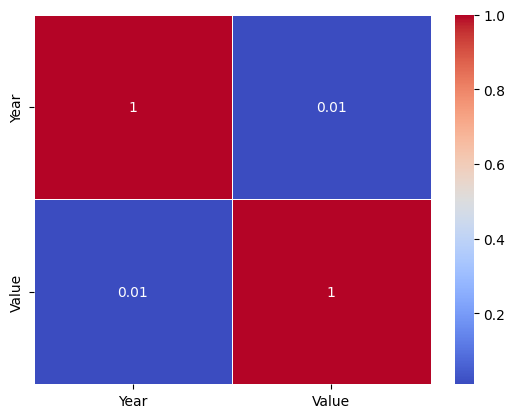

In [43]:
import seaborn
import matplotlib.pyplot as plt

seaborn.heatmap(merged_df.select_dtypes(include = ['number']).corr(),
            annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.show()

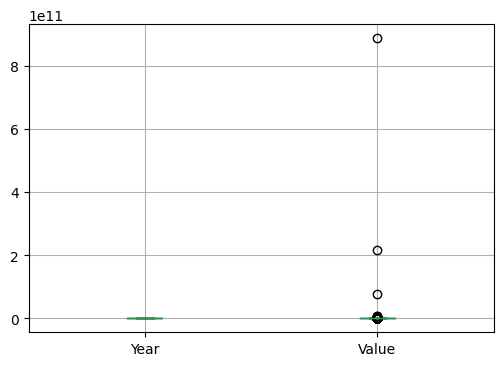

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
merged_df.select_dtypes(include = ['number']).boxplot(figsize = (6, 4))
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


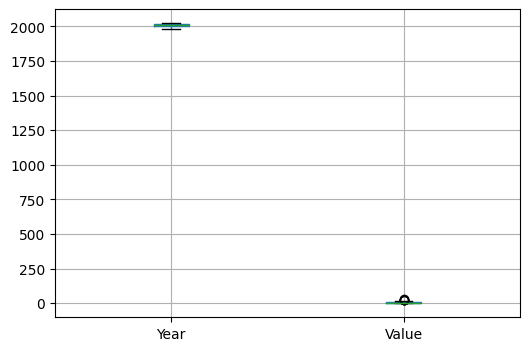

In [45]:
import numpy as np
merged_df['Value'] = np.log(merged_df['Value'] + 1)

merged_df.select_dtypes(include = ['number']).boxplot(figsize=(6, 4))
plt.show()

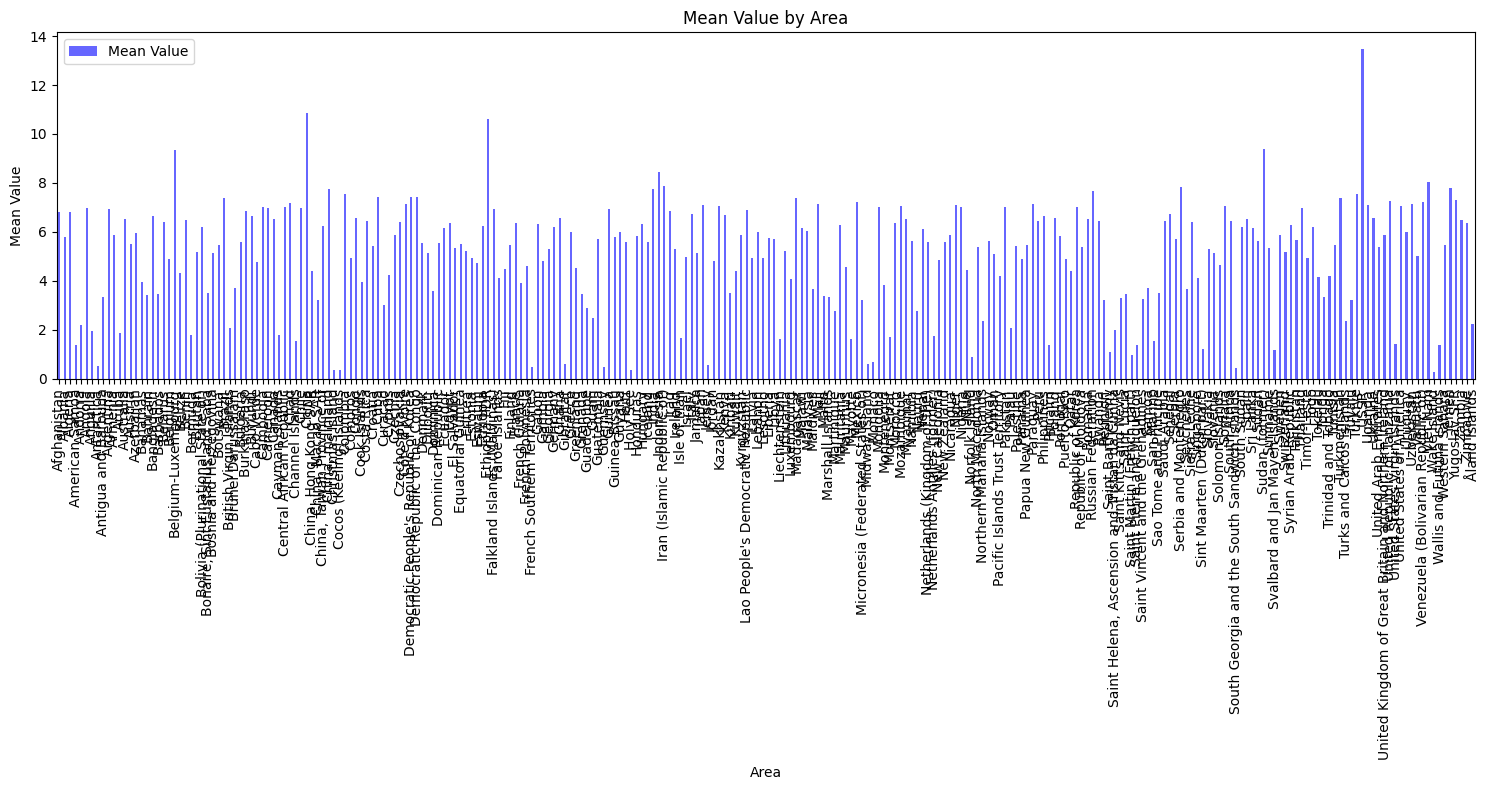

In [47]:
import matplotlib.pyplot as plt

# Calculate the mean 'Value' for each unique 'Area'
mean_value_by_area = merged_df.groupby('Area')['Value'].mean()

# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Create a bar plot for mean values by area
mean_value_by_area.plot(kind='bar', ax=ax1, width=0.4, color='b', alpha=0.6, label='Mean Value')
ax1.set_ylabel('Mean Value')
ax1.tick_params(axis='y')
ax1.set_xlabel('Area')
ax1.set_title('Mean Value by Area')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the legend
ax1.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

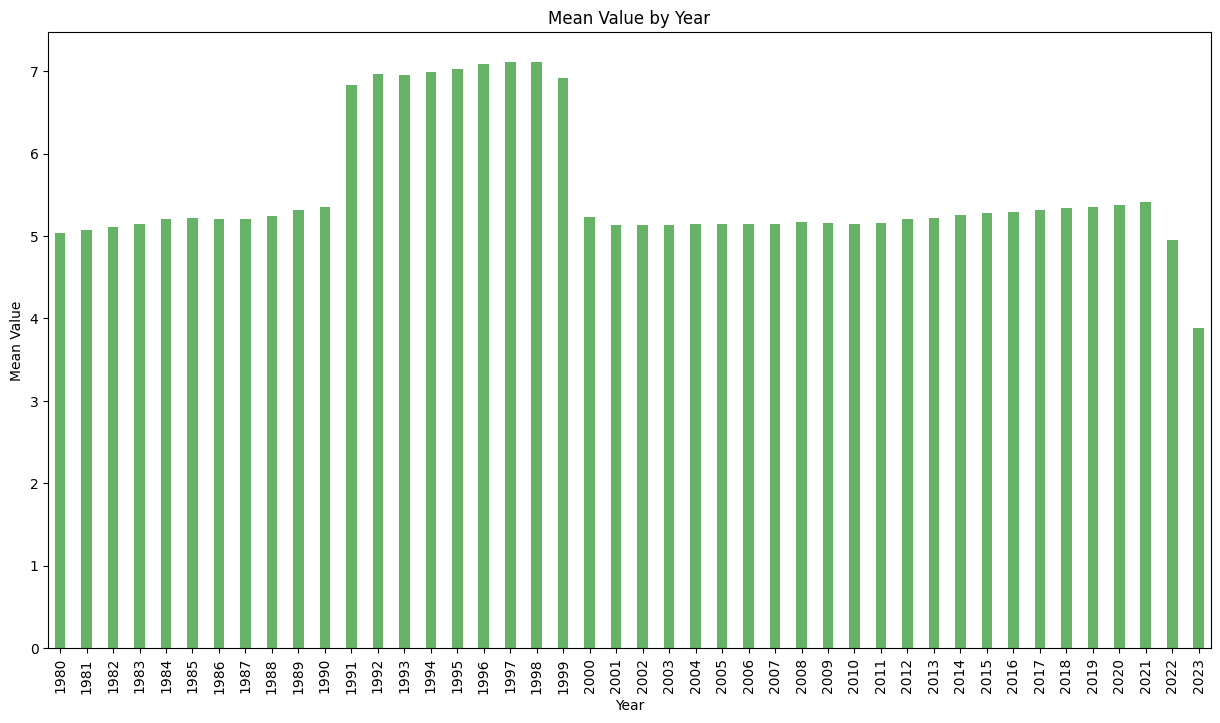

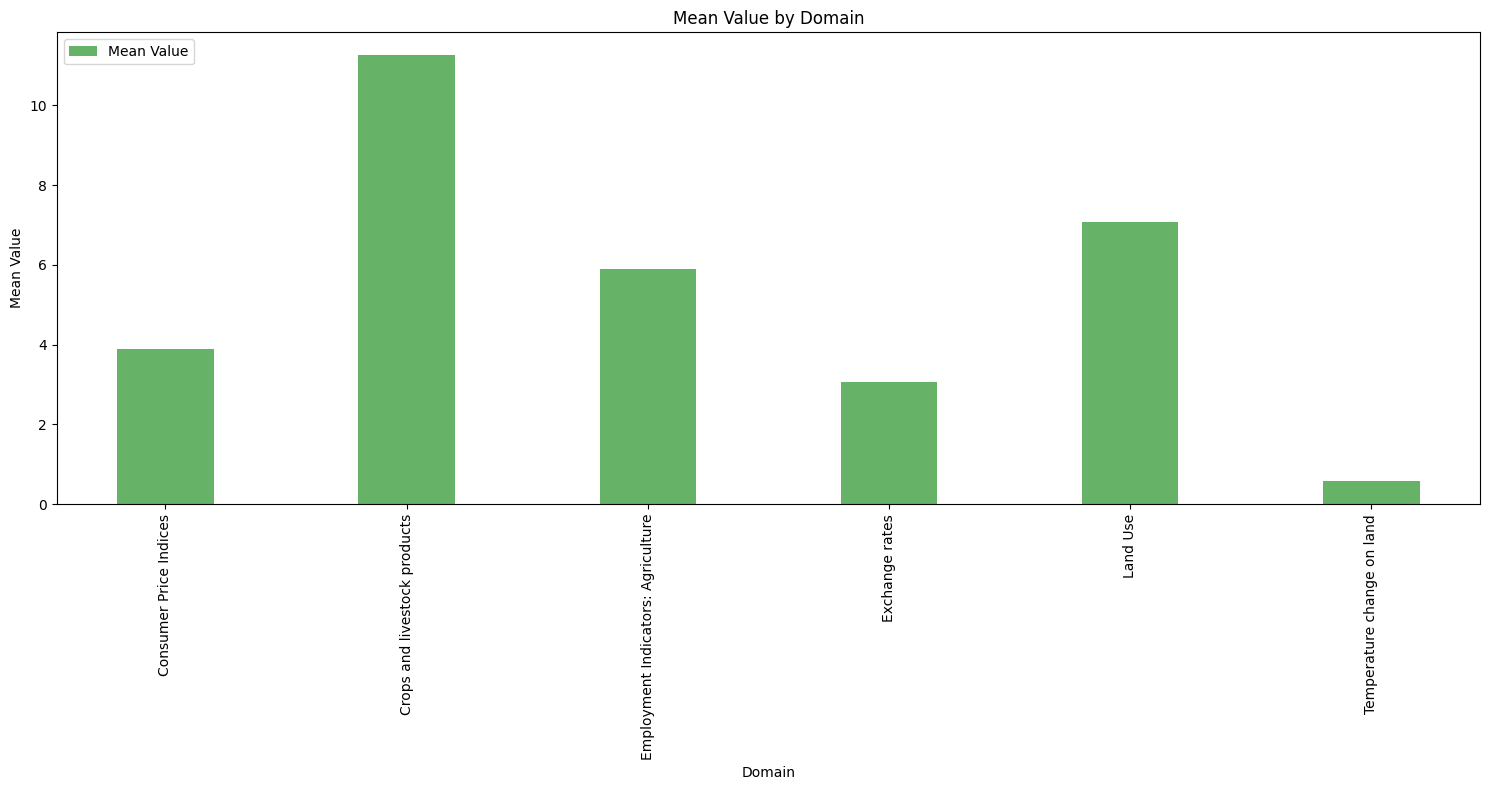

In [48]:
import matplotlib.pyplot as plt

# Calculate the mean 'Value' for each unique 'Area'
mean_value_by_year = merged_df.groupby('Year')['Value'].mean()

# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Create a bar plot for mean values by area
mean_value_by_year.plot(kind='bar', ax=ax1, width=0.4, color='g', alpha=0.6, label='Mean Value')
ax1.set_ylabel('Mean Value', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlabel('Year')
ax1.set_title('Mean Value by Year')

# Calculate the mean 'Value' for each unique 'Area'
mean_value_by_year = merged_df.groupby('Domain')['Value'].mean()

# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Create a bar plot for mean values by area
mean_value_by_year.plot(kind='bar', ax=ax1, width=0.4, color='g', alpha=0.6, label='Mean Value')
ax1.set_ylabel('Mean Value', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlabel('Domain')
ax1.set_title('Mean Value by Domain')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the legend
ax1.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Fit and transform the 'Area' column
onc_encoder = encoder.fit_transform(merged_df[['Area']])

onc_encoder[200:]

<10222x258 sparse matrix of type '<class 'numpy.float64'>'
	with 10222 stored elements in Compressed Sparse Row format>

In [63]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import numpy as np

merged_df = merged_df.dropna(subset = ['Value'])
# Define features and labels
X = merged_df.drop('Value', axis=1)  # Features

# Convert continuous 'Value' to categorical
y = pd.cut(merged_df['Value'], bins=[-np.inf, 2, 5, np.inf], labels=[0, 1, 2])  # 0, 1, 2 based on your ranges

# Preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year']),  # Scale numerical features
        ('cat', OneHotEncoder(), ['Area','Domain'])  # One-hot encode categorical features
    ])

pca = PCA(n_components=10)

# Pipeline with preprocessor and PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)  # Add PCA to the pipeline
])

# Fit the pipeline on the features and transform the data
X_transformed = pipeline.fit_transform(X)

# Apply SMOTE to the transformed data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_transformed, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert X_train into a DataFrame
X_train_df = pd.DataFrame(X_train, columns=[f'PCA{i+1}' for i in range(X_train.shape[1])])

# Check shapes after transformation
print("Shape of X_train after SMOTE:", X_train.shape)
print("Shape of X_test after SMOTE:", X_test.shape)
print("Shape of y_train after SMOTE:", y_train.shape)
print("Shape of y_test after SMOTE:", y_test.shape)

Shape of X_train after SMOTE: (43046, 10)
Shape of X_test after SMOTE: (10762, 10)
Shape of y_train after SMOTE: (43046,)
Shape of y_test after SMOTE: (10762,)


In [64]:
# Convert y_train and y_test from category to numeric
y_train = y_train.cat.codes
y_test = y_test.cat.codes

y_train.head(), y_train.dtype

(7184     2
 11834    0
 43414    0
 35688    2
 25388    2
 dtype: int8,
 dtype('int8'))

In [59]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1)  # Output layer for regression;
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3756 - val_loss: 0.2719
Epoch 2/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3056 - val_loss: 0.2711
Epoch 3/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2985 - val_loss: 0.2713
Epoch 4/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2943 - val_loss: 0.2639
Epoch 5/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2886 - val_loss: 0.2653
Epoch 6/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2866 - val_loss: 0.2662
Epoch 7/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2971 - val_loss: 0.2569
Epoch 8/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2826 - val_loss: 0.2583
Epoch 9/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2871 - val_loss: 0.2621
Epoch 10/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2828 - val_loss: 0.2620
Epoch 11/20
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2872 - val_loss: 0.2569
Epoch 12/20
1077/1077 ━━━━━━━━

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error

# Generate predictions on the test set
test_pred = model.predict(X_test)

# Convert predictions and actual values to DataFrame for easy comparison
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': test_pred.flatten()
})

# Display predictions
print(predictions_df)

# To evaluate performance
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, test_pred.round())
print(f'Mean Squared Error on Test Set: {mse}')

r2 = r2_score(y_test, test_pred)
print(f'R-squared Score on Test Set: {r2}')

mae = mean_absolute_error(y_test, test_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
       Actual  Predicted
0           2   1.741785
1           2   1.402589
2           0  -0.007308
3           1   0.529744
4           1   0.972739
...       ...        ...
10757       2   1.765615
10758       2   1.799004
10759       1   1.177575
10760       1   0.529691
10761       0   0.531286

[10762 rows x 2 columns]
Mean Squared Error on Test Set: 0.33107230067253113
R-squared Score on Test Set: 0.5973131656646729
Mean Absolute Error on Test Set: 0.36087408661842346


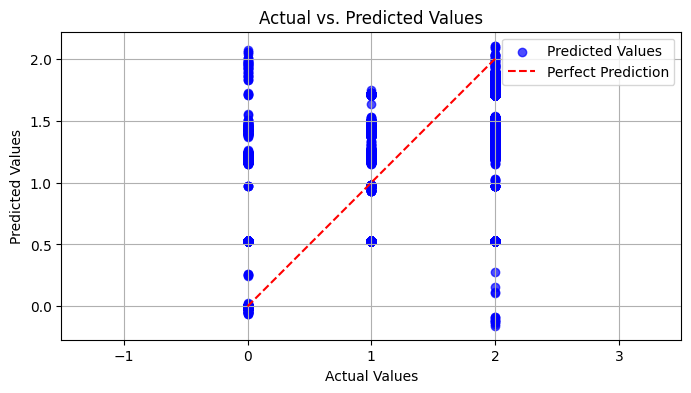

In [101]:
import matplotlib.pyplot as plt

# Plotting Actual vs. Predicted values
plt.figure(figsize=(8, 4))
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'], alpha=0.7, color='blue', label='Predicted Values')
plt.plot([predictions_df['Actual'].min(), predictions_df['Actual'].max()],
         [predictions_df['Actual'].min(), predictions_df['Actual'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
   Year  Predicted Value
0  2025         1.890460
1  2026         1.893594
2  2027         1.896728
3  2028         1.899861
4  2029         1.902995
5  2030         1.906129
6  2031         1.909262
7  2032         1.912396
8  2033         1.915529
9  2034         1.918663


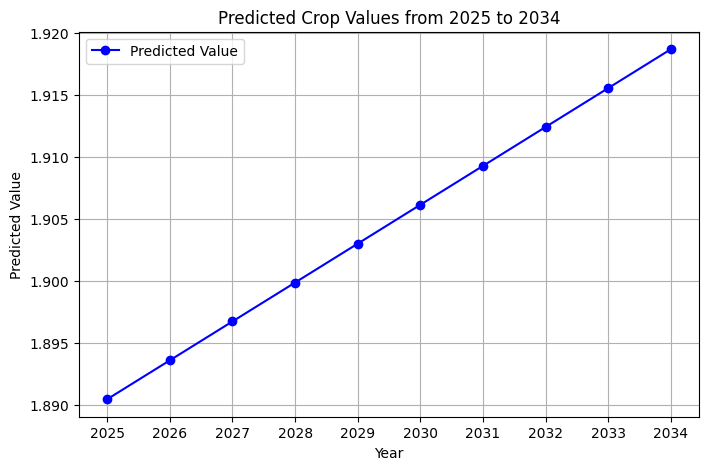

In [91]:
import pandas as pd
import numpy as np

# Assuming your last available year is 2024
last_year = 2024
future_years = np.arange(last_year + 1, last_year + 11)  # 2025 to 2034

most_common_area = merged_df['Area'].mode()[0]
most_common_domain = merged_df['Domain'].mode()[0]

# Create the future data dictionary with repeating values
future_data = {
    'Year': future_years,
    'Area': [most_common_area] * len(future_years),
    'Domain': [most_common_domain] * len(future_years)
}

# Create a DataFrame from the future data
future_df = pd.DataFrame(future_data)

# Transform the future data using the same preprocessing pipeline
future_X = pipeline.transform(future_df)

# Generate predictions for future years
future_predictions = model.predict(future_X)

# Create a DataFrame for future predictions
predictions_df = pd.DataFrame({
    'Year': future_years,
    'Predicted Value': future_predictions.flatten()  # Flatten to convert to 1D array
})

print(predictions_df)

import matplotlib.pyplot as plt

# Plotting predicted values over the years
plt.figure(figsize=(8, 5))
plt.plot(predictions_df['Year'], predictions_df['Predicted Value'], marker='o', linestyle='-', color='b', label='Predicted Value')
plt.title('Predicted Crop Values from 2025 to 2034')
plt.xlabel('Year')
plt.ylabel('Predicted Value')
plt.xticks(predictions_df['Year'])  # Show all years on x-axis
plt.grid()
plt.legend()
plt.show()



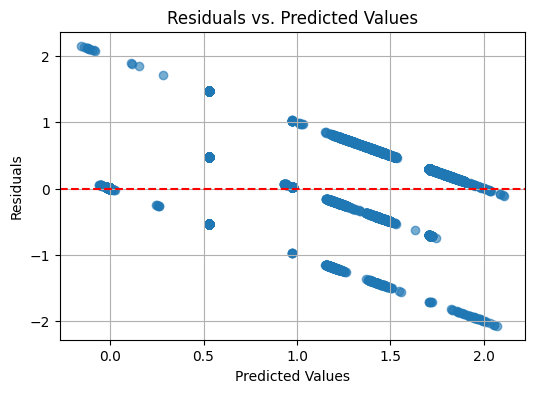

In [102]:
predictions_df['Residuals'] = predictions_df['Actual'] - predictions_df['Predicted']

plt.figure(figsize=(6, 4))
plt.scatter(predictions_df['Predicted'], predictions_df['Residuals'], alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()
